# Prediction using Unsupervised ML

Name: Akhil A
Task : 02
Under : Sparks Foundation

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [102]:
df=pd.read_csv("Iris.csv")

In [103]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [105]:
flower=df["Species"].unique()
flower

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### We are dropping the Id and Species columns as they aren't required in the Unsupervised ML

In [106]:
df.drop(["Id","Species"],inplace=True,axis=1)

#### Dataset after optimizing the dataset

In [107]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
df[df.isna()].count()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### Applying the KMeans algorithm for preperation of the model

In [109]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

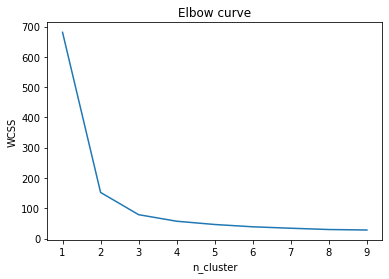

In [110]:
plt.title("Elbow curve")
plt.xlabel("n_cluster")
plt.ylabel("WCSS")
plt.plot(k_rng, sse)

#### From the elbow curve we observe that the number of cluster is three.

In [111]:
km=KMeans(n_clusters=3)
y_kmean=km.fit_predict(df)

In [112]:
df=df.iloc[:,[0,1,2,3]].values

#### Visualization of the model

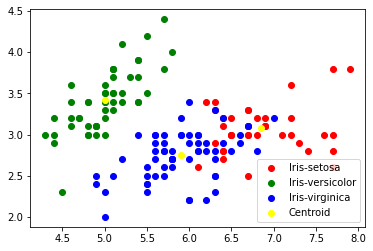

In [125]:
plt.scatter(df[y_kmean==0,0],df[y_kmean==0,1],c="red",label=flower[0])
plt.scatter(df[y_kmean==1,0],df[y_kmean==1,1],c="green",label=flower[1])
plt.scatter(df[y_kmean==2,0],df[y_kmean==2,1],c="blue",label=flower[2])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="yellow",label="Centroid")
plt.legend()